In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
import pathlib

from PIL import Image
from random import randint


# Tensorflow


# Preprocessing

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import KFold 

# Models
from sklearn import tree
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

from sklearn.utils import shuffle

### 1. Coleta do conjunto de dados.

**Carregando cada imagem em uma lista e salvando o rótulo correspondente em outra lista.**

In [6]:
path_dir = pathlib.Path(path) 
class_names = np.array(sorted([item.name for item in path_dir.glob('*')]))
print(class_names)

['Mild_Demented' 'Moderate_Demented' 'Non_Demented' 'Very_Mild_Demented']


### 2. Pré-processamento e análise de dados.

In [7]:
images = []
targets = []

for label in class_names:
    target_folder = path + label
    my_dir = os.listdir(target_folder)
    for img in my_dir:
        image_path = os.path.join(target_folder, img)
        # Carrega a imagem.
        image = Image.open(image_path)
        # Redimensiona a imagem para 128x128 pixels.
        image = image.resize((128, 128))
        # Converte a imagem para um array numpy.
        image = np.array(image)
        # Normaliza os valores de pixel para estarem entre 0 e 1.
        #image = image/255
        images.append(image)
        targets.append(label)


images, targets = shuffle(images, targets, random_state=42)

In [8]:
df = pd.DataFrame({'data': images, 'target': targets})

In [9]:
df.head()

,data,target
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Non_Demented
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Non_Demented
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Very_Mild_Demented
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Very_Mild_Demented
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Mild_Demented


In [10]:
df.head()

,data,target
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Non_Demented
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Non_Demented
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Very_Mild_Demented
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Very_Mild_Demented
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Mild_Demented


In [11]:
df.data.shape

(6400,)

In [12]:
df.shape

(6400, 2)

In [13]:
df.target.shape

(6400,)

In [14]:
df['target'].value_counts()

Non_Demented          3200
Very_Mild_Demented    2240
Mild_Demented          896
Moderate_Demented       64
Name: target, dtype: int64

In [15]:
df.info

<bound method DataFrame.info of                                                    data              target
0     [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...        Non_Demented
1     [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...        Non_Demented
2     [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  Very_Mild_Demented
3     [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  Very_Mild_Demented
4     [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...       Mild_Demented
...                                                 ...                 ...
6395  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...        Non_Demented
6396  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  Very_Mild_Demented
6397  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  Very_Mild_Demented
6398  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  Very_Mild_Demented
6399  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...       Mild_Demented

[6400 rows x 2 columns]>

In [16]:
def image_plot (images):
    for i in images.values:
        # cmap='gray'
        plt.imshow(i[0])
        plt.title(i[1], fontweight ="bold") 
        plt.show()

        # plot the pixel values
        plt.hist(i[0].ravel(), bins=50, density=True)
        plt.xlabel("pixel values")
        plt.ylabel("relative frequency")
        plt.title("distribution of pixels")
        plt.show()

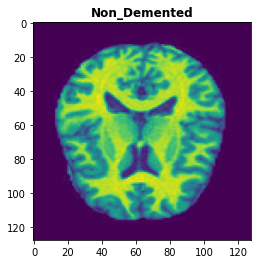

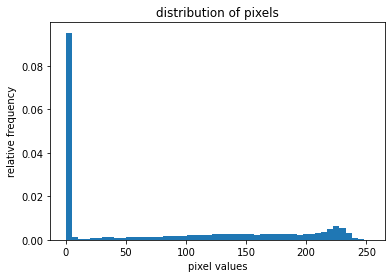

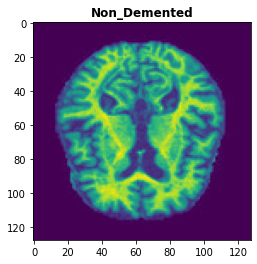

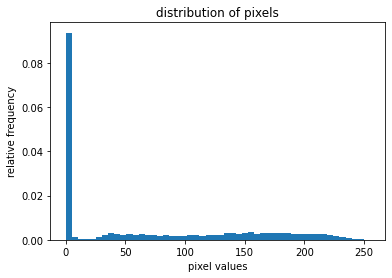

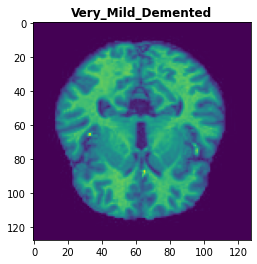

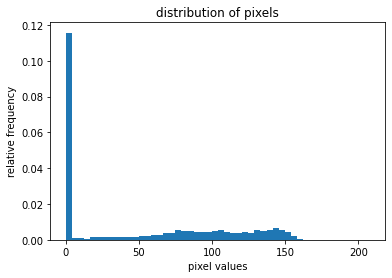

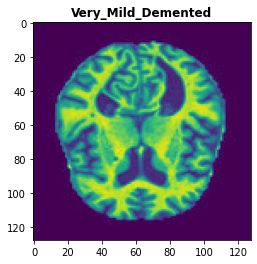

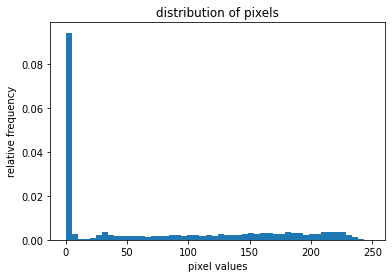

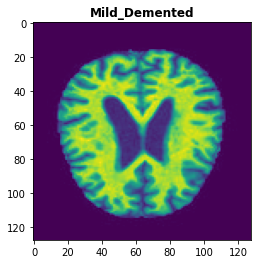

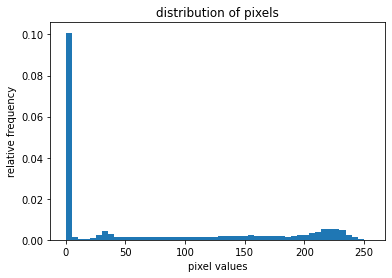

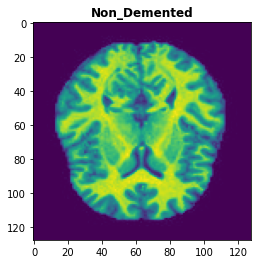

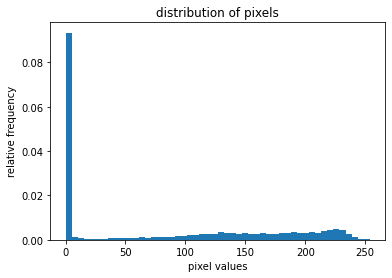

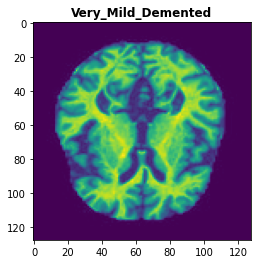

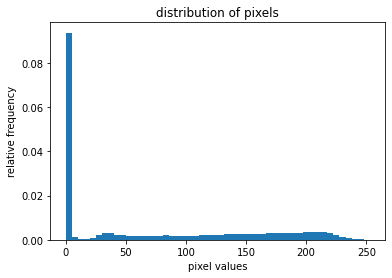

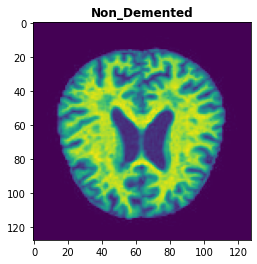

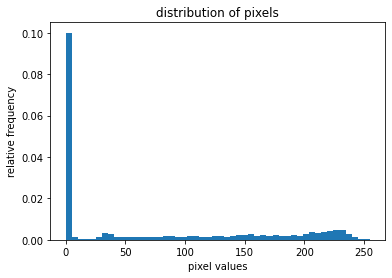

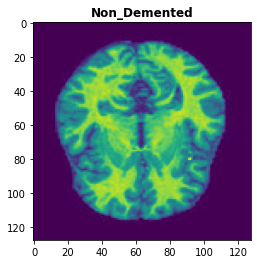

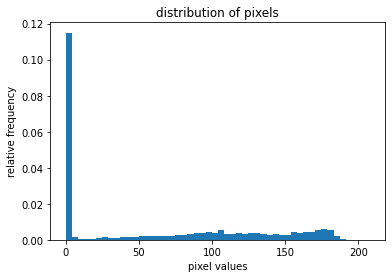

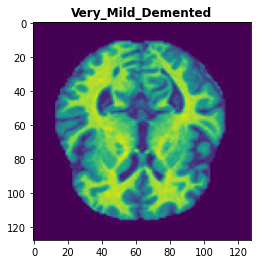

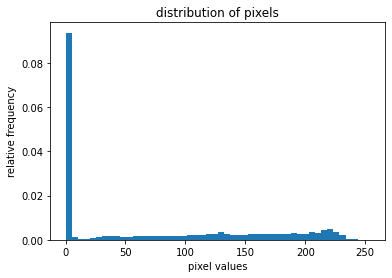

In [17]:
#df.loc[['data', 'target']]
data1 = df.iloc[0:10]
image_plot (data1)


# Carregar uma imagem do conjunto de dados

In [18]:
X = images
y = targets

### 3. Particionamento dos dados em conjunto de treino e em conjunto de teste.

In [19]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
# Normaliza os valores de pixel para que estejam entre 0 e 1
X_train = np.array(X_train) / 255.0
X_test = np.array(X_test) / 255.0

# Converte os rótulos em valores numéricos usando LabelEncoder
label_encoder = LabelEncoder()
print(np.unique(y_train,return_counts = True))
y_train = label_encoder.fit_transform(y_train)
print(np.unique(y_train,return_counts = True))
print(np.unique(y_test,return_counts = True))
y_test = label_encoder.transform(y_test)
print(np.unique(y_test,return_counts = True))

# Transforma as imagens em vetores de recursos
X_train = [(np.array(img)).flatten() for img in X_train]
X_test = [(np.array(img)).flatten() for img in X_test]

(array(['Mild_Demented', 'Moderate_Demented', 'Non_Demented',
       'Very_Mild_Demented'], dtype='<U18'), array([ 620,   45, 2240, 1575]))
(array([0, 1, 2, 3]), array([ 620,   45, 2240, 1575]))
(array(['Mild_Demented', 'Moderate_Demented', 'Non_Demented',
       'Very_Mild_Demented'], dtype='<U18'), array([276,  19, 960, 665]))
(array([0, 1, 2, 3]), array([276,  19, 960, 665]))


In [21]:
unique, frequency = np.unique(y_train,  
                          return_counts = True) 
print("Unique Values:",  
  unique) 
print("Frequency Values:", 
  frequency)

Unique Values: [0 1 2 3]
Frequency Values: [ 620   45 2240 1575]


In [22]:
df['target'].value_counts()

Non_Demented          3200
Very_Mild_Demented    2240
Mild_Demented          896
Moderate_Demented       64
Name: target, dtype: int64

#### 4. Seleção de modelos de ML e DL.

#### Criando modelos 

In [23]:
def application_of_metrics (y_test, y_pred):
    metrics = {}
    
    metrics['accuracy'] = accuracy_score(y_test, y_pred)
    metrics['f1_macro'] = f1_score(y_test, y_pred, average='macro')
    metrics['precision'] = precision_score(y_test, y_pred, average='macro')
    metrics['recall'] = recall_score(y_test, y_pred, average='macro')
    metrics['confusion_matrix'] = confusion_matrix(y_test, y_pred)
    #print("Acurácia: {:.2f}%".format(accuracy * 100))
    #print("F1 macro: {:.2f}%".format(f1_macro * 100))
    #print("Precision: {:.2f}%".format(precision * 100))
    #print("Recall: {:.2f}%".format(recall * 100))
    
    return metrics

In [31]:
def model_application (model, X_train, y_train, X_test, y_test):
    # Treinar o modelo usando o conjunto de treinamento.
    model.fit(X_train, y_train)
    
    # Fazer previsões no conjunto de teste
    y_pred = model.predict(X_test)
    
    print(model.score(X_test, y_test))
    
    return application_of_metrics(y_test, y_pred)
    

In [88]:
# Criando o modelo de Random Forest
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
model_application(rfc, X_train, y_train, X_test, y_test)

0.8802083333333334


{'accuracy': 0.8802083333333334,
 'f1_macro': 0.7463301115989733,
 'precision': 0.9336510310839498,
 'recall': 0.6862139213522938,
 'confusion_matrix': array([[181,   0,  38,  57],
        [  0,   5,   2,  12],
        [  0,   0, 943,  17],
        [  0,   0, 104, 561]])}

In [89]:
# Criar modelo SVM
model = SGDClassifier(random_state=42)
model_application(model, X_train, y_train, X_test, y_test)

0.8296875


{'accuracy': 0.8296875,
 'f1_macro': 0.8194143386995509,
 'precision': 0.8498164632795401,
 'recall': 0.8366312350168901,
 'confusion_matrix': array([[265,   0,   6,   5],
        [  4,  15,   0,   0],
        [111,   0, 817,  32],
        [141,   0,  28, 496]])}

In [90]:
# Criando modelo SVM
model = SVC(kernel='rbf', random_state=42)
model_application(model, X_train, y_train, X_test, y_test)

0.7401041666666667


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 0.7401041666666667,
 'f1_macro': 0.49734161236699165,
 'precision': 0.6037662336727303,
 'recall': 0.4793408453198213,
 'confusion_matrix': array([[ 87,   0,  74, 115],
        [  0,   0,   3,  16],
        [  2,   0, 874,  84],
        [  0,   0, 205, 460]])}

In [91]:
# Criando o modelo SVM
model = SVC(gamma="scale",class_weight="balanced",C=100)
model_application(model, X_train, y_train, X_test, y_test)

0.990625


{'accuracy': 0.990625,
 'f1_macro': 0.990791179442224,
 'precision': 0.9932974610775636,
 'recall': 0.9883966029203443,
 'confusion_matrix': array([[266,   0,   6,   4],
        [  0,  19,   0,   0],
        [  2,   0, 956,   2],
        [  0,   0,   4, 661]])}

In [32]:
# Criando o modelo KNN
model = KNeighborsClassifier()
model_application(model, X_train, y_train, X_test, y_test)

0.9479166666666666


{'accuracy': 0.9479166666666666,
 'f1_macro': 0.9380891444715963,
 'precision': 0.9664320414910038,
 'recall': 0.9140683740601503,
 'confusion_matrix': array([[253,   0,  16,   7],
        [  0,  16,   1,   2],
        [  2,   0, 941,  17],
        [  5,   0,  50, 610]])}

In [ ]:
# Criando modelo Gradient Boosting
gbc = GradientBoostingClassifier()
model_application(gbc, X_train, y_train, X_test, y_test)

**Validação Cruzada**

In [20]:
X_cross = np.array(X) / 255.0
# Transformar as imagens em vetores de recursos
X_cross = [np.array(img).flatten() for img in X_cross]

# Converter os rótulos em valores numéricos usando LabelEncoder
label_encoder = LabelEncoder()
y_cross = label_encoder.fit_transform(y)
#tipo_encoded, tipo_categories = pd.factorize(y)

In [21]:
k = 5

In [22]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
result_scores = cross_val_score(model, X_cross, y_cross, cv= k, scoring='accuracy')

print("K-Fold (R^2) Scores: {0}".format(result_scores))
print("Mean R^2 for Cross-Validation K-Fold: {0}".format(result_scores.mean()))

K-Fold (R^2) Scores: [0.92265625 0.9109375  0.92890625 0.8984375  0.9171875 ]
Mean R^2 for Cross-Validation K-Fold: 0.915625


In [23]:
def kfold_application (model, k, X, y):
    # Cria um objeto KFold com shuffle=True (embaralhar).
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    # Realiza a validação cruzada usando o método cross_val_score.
    result_scores = cross_val_score(model, X, y, cv=kf)

    print("K-Fold (R^2) Scores: {0}".format(result_scores))
    print("Mean R^2 for Cross-Validation K-Fold: {0}".format(result_scores.mean()))

In [24]:
# Realiza a validação cruzada usando o método cross_val_score.
model = RandomForestClassifier(random_state=42)
kfold_application (model, k, X_cross, y_cross)

K-Fold (R^2) Scores: [0.9109375  0.90390625 0.92578125 0.92265625 0.91328125]
Mean R^2 for Cross-Validation K-Fold: 0.9153125


In [25]:
# Realiza a validação cruzada usando o método cross_val_score.
model = SGDClassifier(random_state=42)
kfold_application (model, k, X_cross, y_cross)

K-Fold (R^2) Scores: [0.8734375  0.96171875 0.9421875  0.93984375 0.928125  ]
Mean R^2 for Cross-Validation K-Fold: 0.9290625


In [27]:
# Realiza a validação cruzada usando o método cross_val_score.
model = KNeighborsClassifier()
kfold_application (model, k, X_cross, y_cross)

K-Fold (R^2) Scores: [0.96796875 0.97421875 0.97421875 0.9828125  0.9859375 ]
Mean R^2 for Cross-Validation K-Fold: 0.9770312500000001


**Grid Search**

In [24]:
def grid_search_application (model, X_train, y_train, X_test, y_test, k, param_grid):
    # Crie uma instância do GridSearchCV
    grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=k)

    # Ajuste o grid search aos dados
    grid_search.fit(X_train, y_train)

    # Acesse os melhores hiperparâmetros e o melhor modelo
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Fazer previsões no conjunto de teste
    y_pred = grid_search.predict(X_test)
    
    results = {}
    
    results['metrics'] = application_of_metrics(y_test, y_pred) 
    results['best_params'] =  best_params
    results['best_estimator'] = best_model
    
    return results

In [ ]:
# Crie uma instância do modelo
model = SVC()

# Defina a grade de hiperparâmetros
param_grid = {
    'C': [0.1, 1, 10], 
    'kernel': ['linear', 'rbf'], 
    'gamma': [0.1, 1, 'scale']}

grid_search_application (model, X_train, y_train, X_test, y_test, k, param_grid)

In [25]:
# Crie uma instância do modelo
model = RandomForestClassifier()

# Defina a grade de hiperparâmetros
param_grid = param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [2, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

grid_search_application (model, X_train, y_train, X_test, y_test, k, param_grid)

NameError: name 'k' is not defined

**Redes Neurais**